In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv('data/diabetes.csv')

Lalu kita tampilkan 5 baris teratas dari dataframe untuk melihat isi dari dataset. Untuk melakukannya kita dapat menjalankan kode **df.head()** seperti di bawah.

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel
X = df[df.columns[:8]]
 
# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']

In [7]:
from sklearn.preprocessing import StandardScaler
 
# standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [8]:
from sklearn.model_selection import train_test_split
 
# memisahkan data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.svm import SVC
 
# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [10]:
# Menampilkan skor akurasi prediksi
clf.score(X_test, y_test)

0.7559055118110236

In [11]:
import xgboost as xgb

In [12]:
!pip install xgboost

  Using cached xgboost-1.7.1-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl (1.8 MB)


In [13]:

# read in data
#dtrain = xgb.DMatrix('demo/data/agaricus.txt.train')
#dtest = xgb.DMatrix('demo/data/agaricus.txt.test')
# specify parameters via map
#param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
#num_round = 2
#bst = xgb.train(param, dtrain, num_round)
# make prediction
#preds = bst.predict(dtest)
#X_train, X_test, y_train, y_test

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10) #reg:squarederror try out

In [14]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[22:33:32] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [17]:
!pip install graphviz

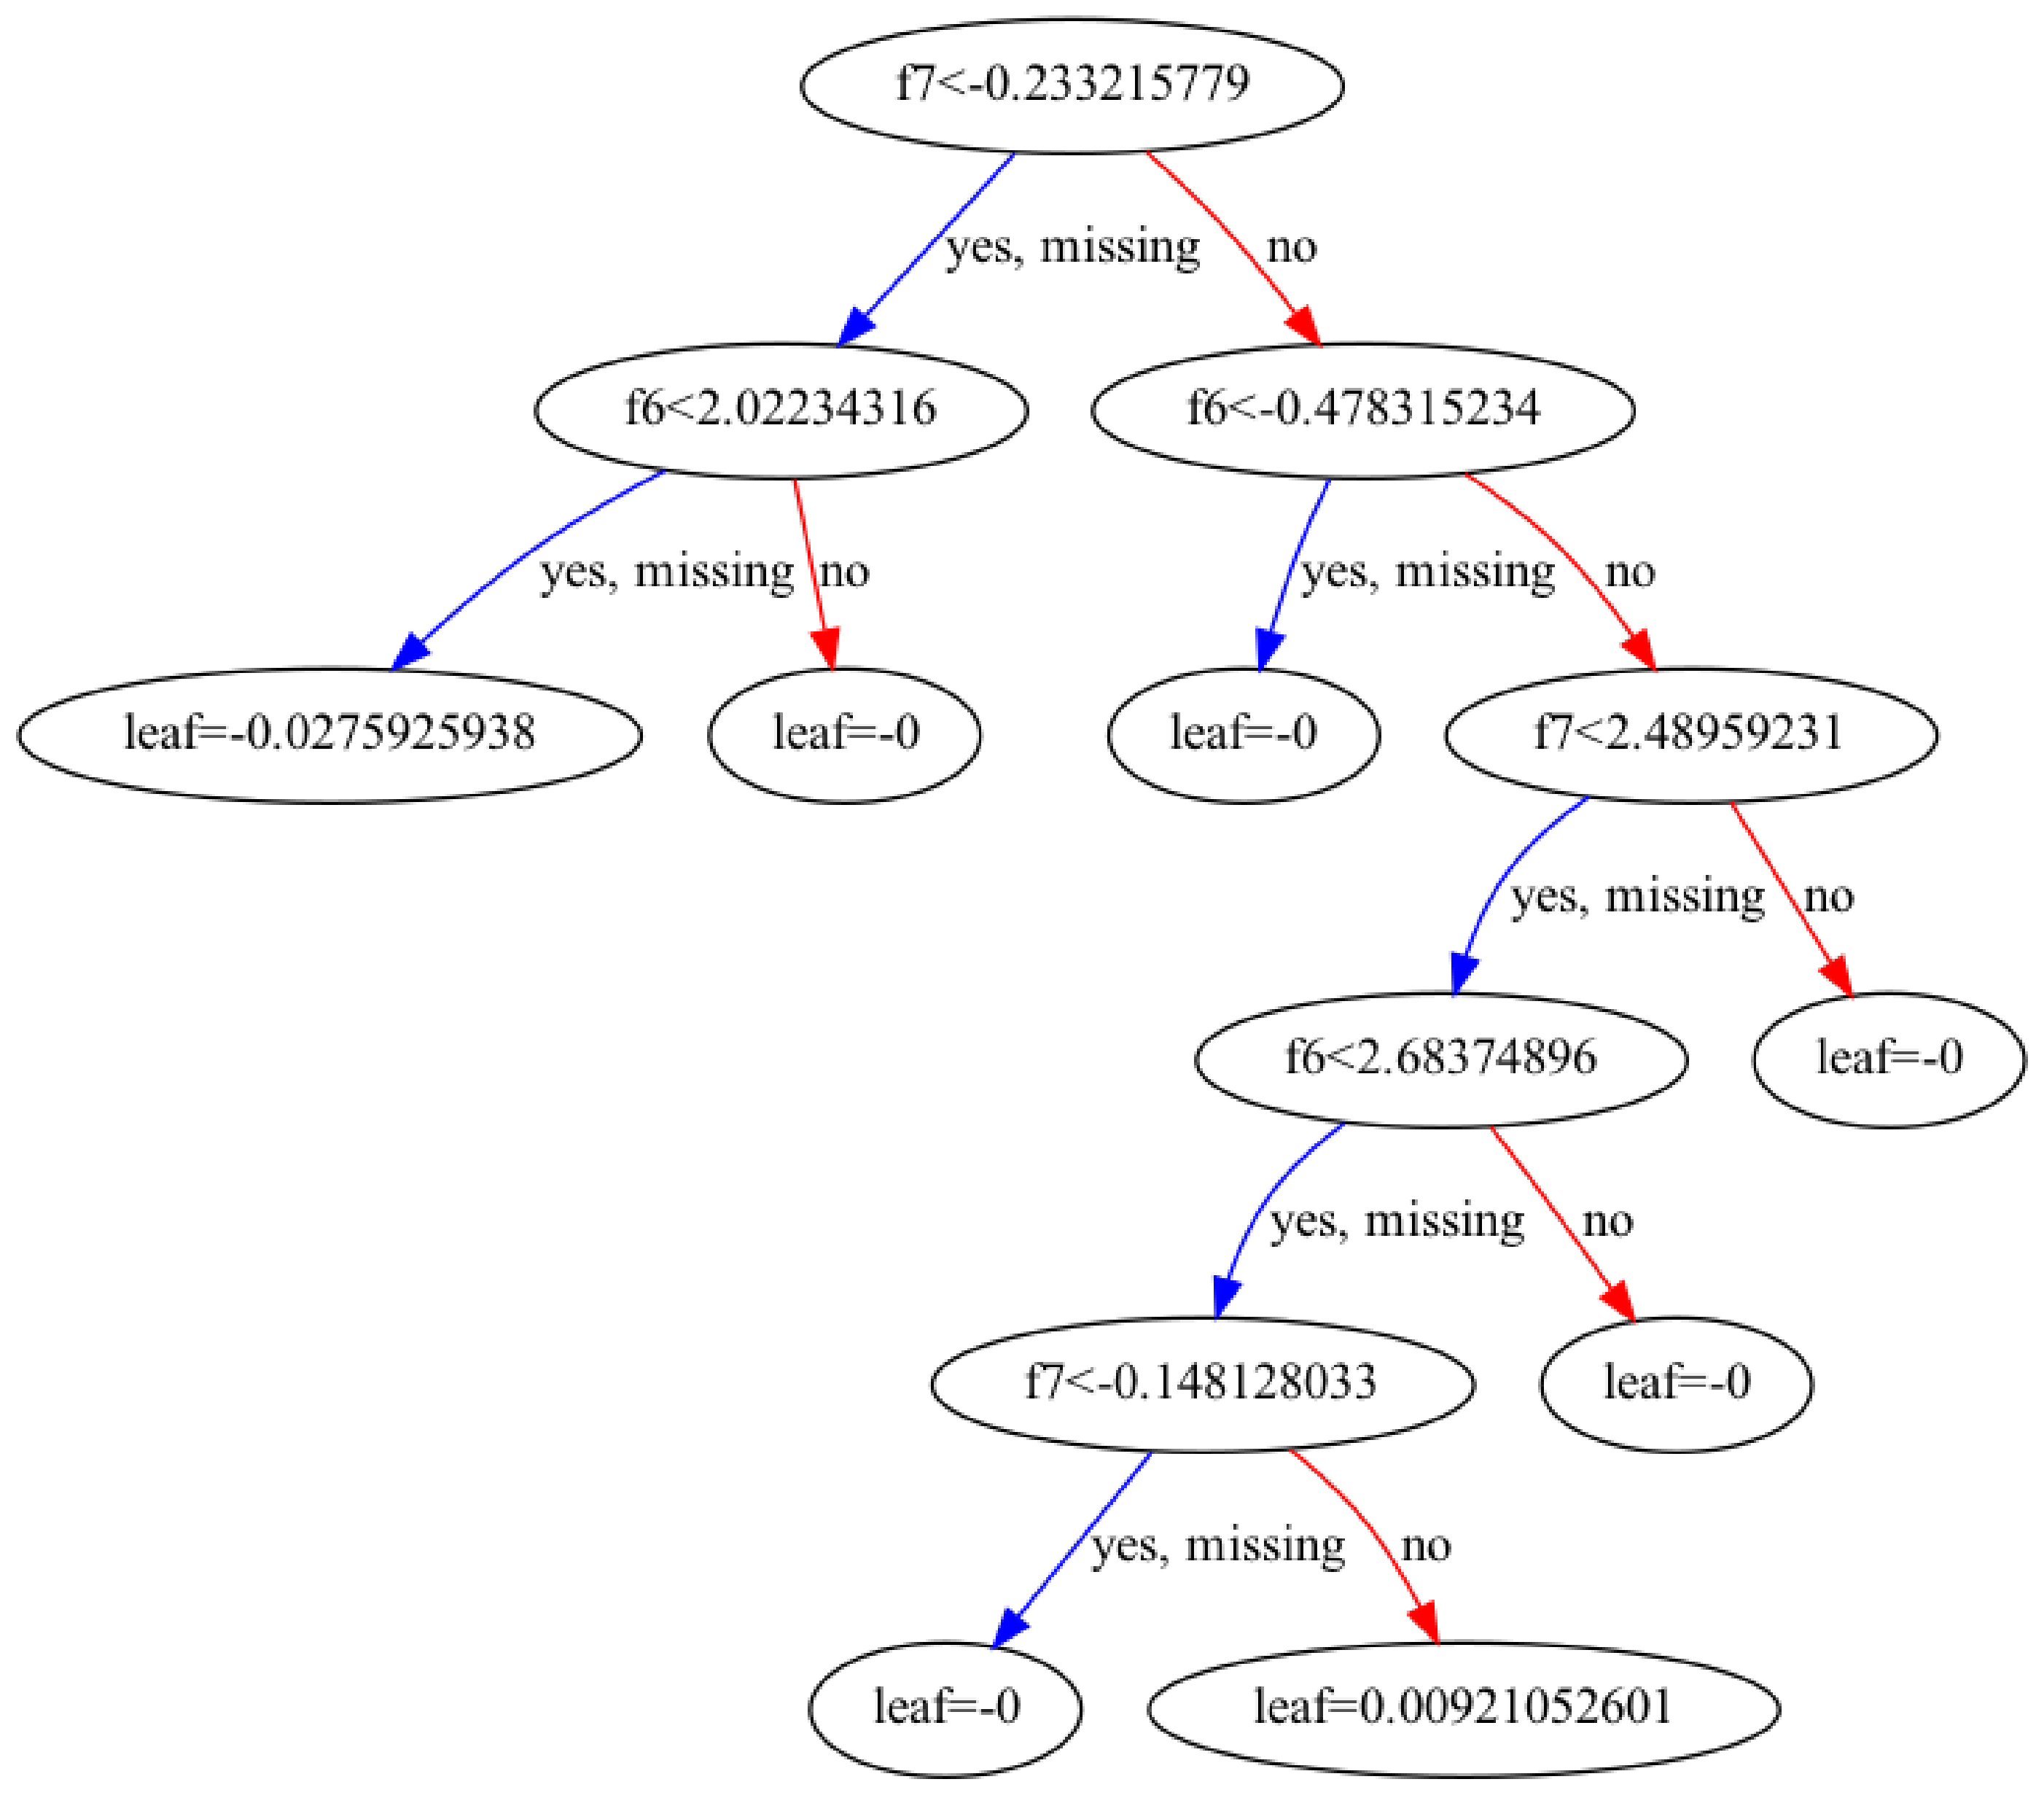

In [18]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 50]
plt.show()